# COVID-19 Dataset
The dataset used here are recorded the case from Jan 2020 to Jul 2020

In [1]:
from google.colab import files 
import pandas as pd 
import io 


uploaded = files.upload()

Saving full_grouped.csv to full_grouped.csv


In [6]:
df = pd.read_csv(io.BytesIO(uploaded['full_grouped.csv']),parse_dates=["Date"])

In [7]:
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


Showing the dataset (top 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


Showing the info of each column

In [9]:
df.isna().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

Showing the number of missing values

In [15]:
df_date = df.Date.dt
df["month"] = df_date.month
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,month
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,1
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,1
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,1
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,1
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,1
...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,7
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,7
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,7
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,7


Create new column (month), from parsed column Date

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Import libraries for data visualization

# Q.1) Showing the number of Confirmed, Deaths and Recovered Cases in each Region

In [47]:
pd.pivot_table(df, values=['Confirmed', 'Deaths', 'Recovered'], index=["Country/Region"])

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,10299.946809,261.159574,4245.957447
Albania,1046.287234,30.361702,632.324468
Algeria,6275.292553,414.744681,4020.728723
Andorra,502.148936,28.845745,367.414894
Angola,120.542553,5.734043,34.962766
...,...,...,...
West Bank and Gaza,1241.813830,7.287234,325.127660
Western Sahara,4.792553,0.335106,3.446809
Yemen,357.340426,94.186170,126.484043


 # Q.2) In which region are the most confirmed cases?

In [21]:
df.groupby(["Country/Region"])["Confirmed"].sum().reset_index().sort_values(by="Confirmed", ascending=False).head(10)

,Country/Region,Confirmed
173,US,224345948
23,Brazil,89524967
138,Russia,45408411
79,India,40883464
157,Spain,27404045
177,United Kingdom,26748587
85,Italy,26745145
61,France,21210926
65,Germany,21059152
81,Iran,19339267


# Q.3) In which region are the most deaths cases?

In [22]:
df.groupby(["Country/Region"])["Deaths"].sum().reset_index().sort_values(by="Deaths", ascending=False).head(10)

,Country/Region,Deaths
173,US,11011411
177,United Kingdom,3997775
23,Brazil,3938034
85,Italy,3707717
61,France,3048524
157,Spain,3033030
111,Mexico,1728277
79,India,1111831
81,Iran,1024136
16,Belgium,963679


# Q.4) In which region the most recovered cases are?

In [24]:
df.groupby(["Country/Region"])["Recovered"].sum().reset_index().sort_values(by="Recovered", ascending=False).head(10)

,Country/Region,Recovered
173,US,56353416
23,Brazil,54492873
138,Russia,25120448
79,India,23783720
65,Germany,17107839
85,Italy,15673910
81,Iran,15200895
157,Spain,15093583
172,Turkey,13345389
35,Chile,13292593


# Q.5) The growth of confirmed case based on WHO Region by month

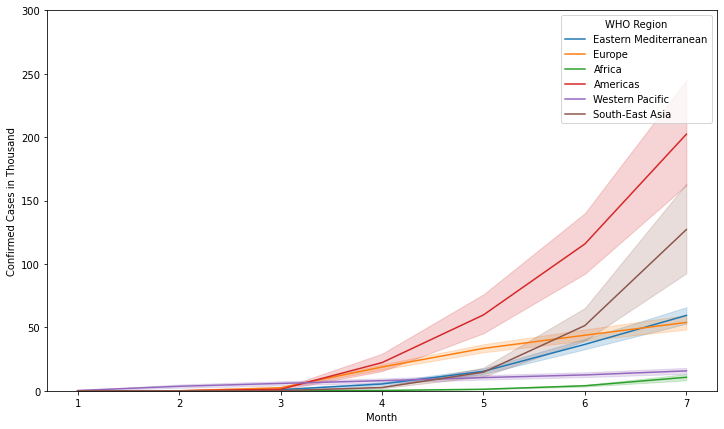

In [45]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df, x="month", y="Confirmed", hue="WHO Region")
plt.ylabel("Confirmed Cases in Thousand")
plt.xlabel("Month")
plt.ylim(0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int));